This notebook plots histograms for all numeric columns in ML374_S5_Practice_Income_Data.csv. The next cell loads the data, cleans simple placeholders and draws density histograms for numeric features.

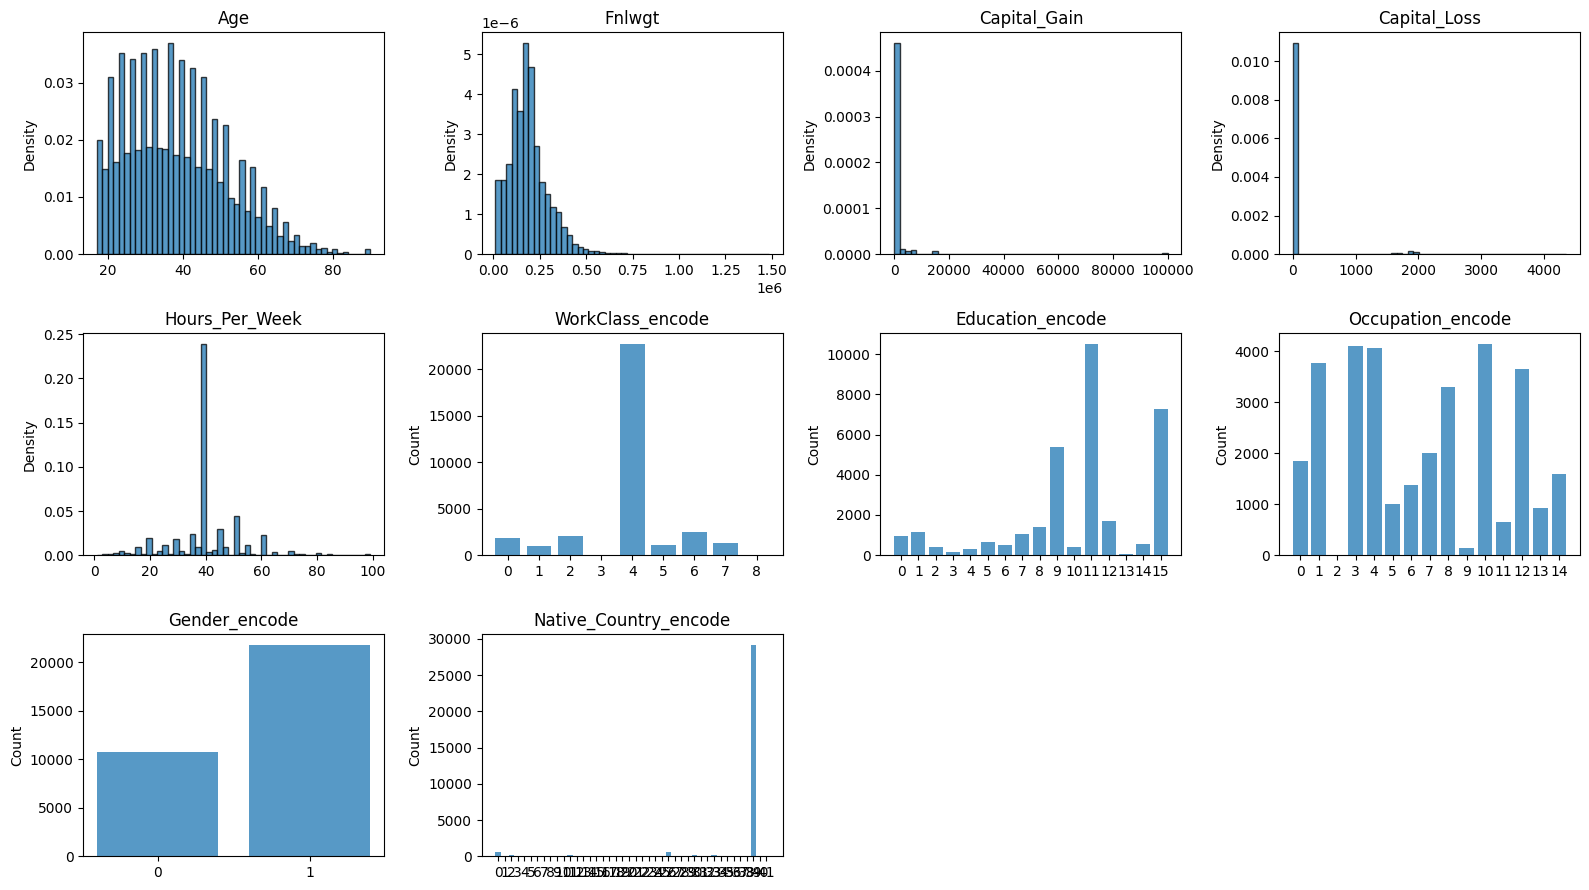

In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Adjust this path if you move the notebook. From this notebook the relative path to the data is '../Data/...'.
csv_path = '../Data/ML374_S5_Practice_Income_Data.csv'

# Load dataset
df = pd.read_csv(csv_path)
# Basic cleanup: trim whitespace from column names and replace placeholder missing values
df.columns = df.columns.str.strip()
df.replace('?', np.nan, inplace=True)

# Prefer these numeric columns (match the image); fall back to numeric detection
desired_numeric = ['Age', 'Fnlwgt', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week']
numeric_cols = [c for c in desired_numeric if c in df.columns]
if len(numeric_cols) == 0:
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Columns to encode and plot (match the image)
encode_cols = ['WorkClass', 'Education', 'Occupation', 'Gender', 'Native_Country']
encode_cols = [c for c in encode_cols if c in df.columns]

# Combine in the order: numeric first, then encoded categorical
all_cols = numeric_cols + encode_cols
if len(all_cols) == 0:
    print('No columns found to plot.')
else:
    # plotting layout
    num_cols = 4  # number of subplot columns per row
    n_plots = len(all_cols)
    n_rows = math.ceil(n_plots / num_cols)

    fig, axes = plt.subplots(n_rows, num_cols, figsize=(num_cols*4, max(3, n_rows*3)))
    # flatten axes to simplify indexing (works even when n_rows==1)
    if isinstance(axes, np.ndarray):
        axes_flat = axes.flatten()
    else:
        axes_flat = [axes]

    for i, col in enumerate(all_cols):
        ax = axes_flat[i]
        if col in numeric_cols:
            data = df[col].dropna()
            if data.size == 0:
                ax.text(0.5, 0.5, 'no data', ha='center')
            else:
                ax.hist(data, bins=50, density=True, color='#1f77b4', edgecolor='black', alpha=0.75)
            ax.set_title(col)
            ax.set_xlabel('')
            ax.set_ylabel('Density')
        else:
            # create numeric codes for the categorical column and plot counts (encoded plot)
            codes = df[col].astype('category').cat.codes
            # cat.codes uses -1 for NaN; drop those when counting
            counts = codes[codes >= 0].value_counts().sort_index()
            if counts.size == 0:
                ax.text(0.5, 0.5, 'no data', ha='center')
            else:
                ax.bar(counts.index, counts.values, color='#1f77b4', alpha=0.75)
                ax.set_xticks(counts.index)
            ax.set_title(f'{col}_encode')
            ax.set_xlabel('')
            ax.set_ylabel('Count')

    # hide any unused subplot axes
    total_axes = n_rows * num_cols
    for j in range(n_plots, total_axes):
        try:
            fig.delaxes(axes_flat[j])
        except Exception:
            pass

    plt.tight_layout()
    plt.show()